In [66]:
import pandas as pd
import matplotlib.pyplot as plt
from IPython.display import display

%matplotlib inline

In [67]:
# Read file
icfes = pd.read_csv("./data/ICFES/icfes.csv", low_memory=False, encoding="utf-8")

print(icfes.shape)
print(len(icfes))
icfes.head()

(559253, 81)
559253


,COLE_AREA_UBICACION,COLE_BILINGUE,COLE_CALENDARIO,COLE_CARACTER,COLE_CODIGO_ICFES,COLE_COD_DANE_ESTABLECIMIENTO,COLE_COD_DANE_SEDE,COLE_COD_DEPTO_UBICACION,COLE_COD_MCPIO_UBICACION,COLE_DEPTO_UBICACION,...,PERCENTIL_LECTURA_CRITICA,PERCENTIL_MATEMATICAS,PERCENTIL_SOCIALES_CIUDADANAS,PERIODO,PUNT_C_NATURALES,PUNT_GLOBAL,PUNT_INGLES,PUNT_LECTURA_CRITICA,PUNT_MATEMATICAS,PUNT_SOCIALES_CIUDADANAS
0,URBANO,N,B,TÉCNICO/ACADÉMICO,17228,376001000314,376001000314,76,76001,VALLE,...,15,4,1,20171,35,177,45,44,31,28
1,URBANO,NaN,B,NaN,663120,319001005240,319001005240,19,19001,CAUCA,...,78,62,85,20171,66,326,55,67,61,70
2,URBANO,S,B,ACADÉMICO,16741,376001001221,376001001221,76,76001,VALLE,...,91,99,76,20171,70,378,100,72,86,66
3,URBANO,S,B,ACADÉMICO,16741,376001001221,376001001221,76,76001,VALLE,...,96,96,100,20171,72,389,85,75,79,83
4,URBANO,S,B,ACADÉMICO,16741,376001001221,376001001221,76,76001,VALLE,...,38,35,63,20171,52,281,80,54,50,61


In [68]:
# Drop ID columns
icfes = icfes.drop(columns=['ESTU_ESTUDIANTE', 'ESTU_COD_RESIDE_DEPTO', 'ESTU_COD_RESIDE_MCPIO', 'ESTU_CONSECUTIVO',
                            'COLE_CODIGO_ICFES', 'COLE_NOMBRE_ESTABLECIMIENTO', 'COLE_NOMBRE_SEDE', 
                    'COLE_COD_MCPIO_UBICACION', 
                    'COLE_COD_DEPTO_UBICACION', 'ESTU_COD_MCPIO_PRESENTACION', 'ESTU_COD_DEPTO_PRESENTACION',
                   'COLE_COD_DANE_ESTABLECIMIENTO', 'COLE_COD_DANE_SEDE'])


In [69]:
# Drop records without socioeconomic data
icfes = icfes.dropna(axis=0, how='all', subset=['FAMI_ESTRATOVIVIENDA','FAMI_TIENECOMPUTADOR',
                                                 'FAMI_TIENELAVADORA','FAMI_TIENEHORNOMICROOGAS',
                                                'FAMI_TIENEAUTOMOVIL'])

# Verify the dropping
icfes3 = icfes.loc[icfes['FAMI_ESTRATOVIVIENDA'].isnull() 
           & icfes['FAMI_TIENECOMPUTADOR'].isnull() 
           & icfes['FAMI_TIENELAVADORA'].isnull() 
           & icfes['FAMI_TIENEHORNOMICROOGAS'].isnull() 
           & icfes['FAMI_TIENEAUTOMOVIL'].isnull()]

icfes3[['FAMI_ESTRATOVIVIENDA','FAMI_TIENECOMPUTADOR',
        'FAMI_TIENELAVADORA','FAMI_TIENEHORNOMICROOGAS','FAMI_TIENEAUTOMOVIL']]

,FAMI_ESTRATOVIVIENDA,FAMI_TIENECOMPUTADOR,FAMI_TIENELAVADORA,FAMI_TIENEHORNOMICROOGAS,FAMI_TIENEAUTOMOVIL


In [70]:
# Use the same value for equivalent values
edu_dict = {"No Sabe":"No sabe", 
            "Primaria Completa": 'Primaria completa', 
            "Primaria Incompleta": 'Primaria incompleta',
            "Secundaria(Bachillerato) Incompleta": 'Secundaria (Bachillerato) incompleta', 
            "Secundaria(Bachillerato) Completa": 'Secundaria (Bachillerato) completa', 
            "Educación Técnica o Tecnológica Completa": 'Técnica o tecnológica completa', 
            "Educación Técnica o Tecnológica Incompleta": 'Técnica o tecnológica incompleta', 
            "Educación Profesional Incompleta": 'Educación profesional incompleta', 
            "Educación Profesional Completa": 'Educación profesional completa'}


icfes['FAMI_EDUCACIONPADRE'] = icfes['FAMI_EDUCACIONPADRE'].replace(to_replace=edu_dict)
icfes['FAMI_EDUCACIONMADRE'] = icfes['FAMI_EDUCACIONMADRE'].replace(to_replace=edu_dict)

icfes['ESTU_ETNIA'] = icfes['ESTU_ETNIA'].replace(
    to_replace={"Comunidad Rom (gitana)": "Comunidades Rom (Gitanas)"})

In [71]:
# Fix capitalization
def capitalize(df, columns):
    for c in columns:
        df[c] = df[c].str.capitalize()

columns = ['ESTU_TIENEETNIA', 'FAMI_TIENEAUTOMOVIL', 'FAMI_TIENECOMPUTADOR']

capitalize(icfes, columns)

In [72]:
# Missing values

icfes['ESTU_ETNIA'] = icfes['ESTU_ETNIA'].fillna('Ninguno')
icfes['ESTU_TIENEETNIA'] = icfes['ESTU_TIENEETNIA'].fillna('No')

#14094 4%
icfes['FAMI_EDUCACIONPADRE'] = icfes['FAMI_EDUCACIONPADRE'].fillna('No responde')
#14082 4%
icfes['FAMI_EDUCACIONMADRE'] = icfes['FAMI_EDUCACIONMADRE'].fillna('No responde')
#16023 4%
icfes['FAMI_ESTRATOVIVIENDA'] = icfes['FAMI_ESTRATOVIVIENDA'].fillna('No responde')
#16328 4%
icfes['FAMI_TIENESERVICIOTV'] = icfes['FAMI_TIENESERVICIOTV'].fillna('No responde')
#14600 4%
icfes['FAMI_NUMLIBROS'] = icfes['FAMI_NUMLIBROS'].fillna('No responde')
#14779 4%
icfes['FAMI_COMELECHEDERIVADOS'] = icfes['FAMI_COMELECHEDERIVADOS'].fillna('No responde')
#15744 4%
icfes['FAMI_COMECARNEPESCADOHUEVO'] = icfes['FAMI_COMECARNEPESCADOHUEVO'].fillna('No responde')
#15609 4%
icfes['FAMI_COMECEREALFRUTOSLEGUMBRE'] = icfes['FAMI_COMECEREALFRUTOSLEGUMBRE'].fillna('No responde')
#15145 4%
icfes['ESTU_DEDICACIONLECTURADIARIA'] = icfes['ESTU_DEDICACIONLECTURADIARIA'].fillna('No responde')
#17028 4%
icfes['ESTU_DEDICACIONINTERNET'] = icfes['ESTU_DEDICACIONINTERNET'].fillna('No responde')
#55162 14%
icfes['COLE_BILINGUE'] = icfes['COLE_BILINGUE'].fillna('SIN INFO')
#6017 2%
icfes['COLE_CARACTER'] = icfes['COLE_CARACTER'].fillna('SIN INFO')

In [73]:
# Replace missing values with the most common one
columns = ['ESTU_GENERO', 'ESTU_DEPTO_RESIDE', 'ESTU_MCPIO_RESIDE', 'FAMI_PERSONASHOGAR', 'FAMI_CUARTOSHOGAR', 
          'FAMI_TIENECOMPUTADOR', 'FAMI_TIENELAVADORA', 'FAMI_TIENEHORNOMICROOGAS', 'FAMI_TIENEAUTOMOVIL', 
           'FAMI_TIENEMOTOCICLETA', 'FAMI_TIENECONSOLAVIDEOJUEGOS', 'FAMI_TRABAJOLABORPADRE', 
           'FAMI_TRABAJOLABORMADRE', 'FAMI_SITUACIONECONOMICA', 'ESTU_HORASSEMANATRABAJA', 'ESTU_TIPOREMUNERACION', 
          'ESTU_PRIVADO_LIBERTAD', 'ESTU_NSE_INDIVIDUAL']

for c in columns:
    if icfes[c].isnull().sum() > 0:
        display(icfes[c].value_counts(dropna=False))
        icfes[c] = icfes[c].fillna(icfes[c].value_counts().idxmax())
        display(icfes[c].value_counts(dropna=False))

F            296157
M            245640
Femenino       6687
Masculino      6190
NaN               5
Name: ESTU_GENERO, dtype: int64

F            296162
M            245640
Femenino       6687
Masculino      6190
Name: ESTU_GENERO, dtype: int64

BOGOTA             91627
ANTIOQUIA          73029
VALLE              45398
CUNDINAMARCA       36143
ATLANTICO          31733
SANTANDER          25920
BOLIVAR            24666
CORDOBA            19465
BOYACA             16831
TOLIMA             16761
NARIÑO             16404
NORTE SANTANDER    15630
MAGDALENA          15576
HUILA              14664
CAUCA              14294
CESAR              12788
META               11987
CALDAS             10681
RISARALDA          10591
SUCRE              10466
LA GUAJIRA          7532
QUINDIO             7235
CASANARE            5690
PUTUMAYO            4357
CHOCO               4283
CAQUETA             4225
ARAUCA              2948
GUAVIARE             949
AMAZONAS             843
SAN ANDRES           631
VICHADA              452
VAUPES               356
NaN                  296
GUAINIA              225
EXTRANJERO             3
Name: ESTU_DEPTO_RESIDE, dtype: int64

BOGOTA             91923
ANTIOQUIA          73029
VALLE              45398
CUNDINAMARCA       36143
ATLANTICO          31733
SANTANDER          25920
BOLIVAR            24666
CORDOBA            19465
BOYACA             16831
TOLIMA             16761
NARIÑO             16404
NORTE SANTANDER    15630
MAGDALENA          15576
HUILA              14664
CAUCA              14294
CESAR              12788
META               11987
CALDAS             10681
RISARALDA          10591
SUCRE              10466
LA GUAJIRA          7532
QUINDIO             7235
CASANARE            5690
PUTUMAYO            4357
CHOCO               4283
CAQUETA             4225
ARAUCA              2948
GUAVIARE             949
AMAZONAS             843
SAN ANDRES           631
VICHADA              452
VAUPES               356
GUAINIA              225
EXTRANJERO             3
Name: ESTU_DEPTO_RESIDE, dtype: int64

BOGOTÁ D.C.        91627
MEDELLIN           28163
CALI               22117
BARRANQUILLA       17164
CARTAGENA          13121
CUCUTA              8750
SOACHA              7521
IBAGUE              7451
BUCARAMANGA         6574
SANTA MARTA         6499
VILLAVICENCIO       6451
SOLEDAD             6426
BELLO               5676
VALLEDUPAR          5586
PEREIRA             5511
MONTERIA            5236
PASTO               4910
MANIZALES           4520
NEIVA               4447
POPAYAN             4050
ARMENIA             4035
SINCELEJO           3637
BUENAVENTURA        3325
PALMIRA             3300
ITAGUI              3215
FLORIDABLANCA       2893
YOPAL               2671
TUNJA               2546
BARRANCABERMEJA     2494
ENVIGADO            2455
                   ...  
PACOA                 18
CARURU                17
AGUADA                17
RECETOR               17
TARAIRA               17
EL CALVARIO           16
CACOTA                16
ALMEIDA               16
PANQUEBA              15


BOGOTÁ D.C.        91923
MEDELLIN           28163
CALI               22117
BARRANQUILLA       17164
CARTAGENA          13121
CUCUTA              8750
SOACHA              7521
IBAGUE              7451
BUCARAMANGA         6574
SANTA MARTA         6499
VILLAVICENCIO       6451
SOLEDAD             6426
BELLO               5676
VALLEDUPAR          5586
PEREIRA             5511
MONTERIA            5236
PASTO               4910
MANIZALES           4520
NEIVA               4447
POPAYAN             4050
ARMENIA             4035
SINCELEJO           3637
BUENAVENTURA        3325
PALMIRA             3300
ITAGUI              3215
FLORIDABLANCA       2893
YOPAL               2671
TUNJA               2546
BARRANCABERMEJA     2494
ENVIGADO            2455
                   ...  
PACOA                 18
AGUADA                17
RECETOR               17
CARURU                17
TARAIRA               17
ALMEIDA               16
EL CALVARIO           16
CACOTA                16
PANQUEBA              15


3 a 4      260770
5 a 6      178437
7 a 8       47068
1 a 2       41523
9 o más     19582
NaN          7299
Name: FAMI_PERSONASHOGAR, dtype: int64

3 a 4      268069
5 a 6      178437
7 a 8       47068
1 a 2       41523
9 o más     19582
Name: FAMI_PERSONASHOGAR, dtype: int64

Tres          209309
Dos           194181
Cuatro         70794
Uno            30424
Cinco          21280
Seis o mas     11555
3               5915
NaN             4489
2               2931
4               2549
5                713
6 o más          275
1                264
Name: FAMI_CUARTOSHOGAR, dtype: int64

Tres          213798
Dos           194181
Cuatro         70794
Uno            30424
Cinco          21280
Seis o mas     11555
3               5915
2               2931
4               2549
5                713
6 o más          275
1                264
Name: FAMI_CUARTOSHOGAR, dtype: int64

Si     329403
No     220677
NaN      4599
Name: FAMI_TIENECOMPUTADOR, dtype: int64

Si    334002
No    220677
Name: FAMI_TIENECOMPUTADOR, dtype: int64

Si     397396
No     140595
SI      12123
NaN      4018
NO        547
Name: FAMI_TIENELAVADORA, dtype: int64

Si    401414
No    140595
SI     12123
NO       547
Name: FAMI_TIENELAVADORA, dtype: int64

No     297018
Si     239939
SI      11100
NaN      5059
NO       1563
Name: FAMI_TIENEHORNOMICROOGAS, dtype: int64

No    302077
Si    239939
SI     11100
NO      1563
Name: FAMI_TIENEHORNOMICROOGAS, dtype: int64

No     421321
Si     127440
NaN      5918
Name: FAMI_TIENEAUTOMOVIL, dtype: int64

No    427239
Si    127440
Name: FAMI_TIENEAUTOMOVIL, dtype: int64

No     327489
Si     209697
NO       9518
NaN      4865
SI       3110
Name: FAMI_TIENEMOTOCICLETA, dtype: int64

No    332354
Si    209697
NO      9518
SI      3110
Name: FAMI_TIENEMOTOCICLETA, dtype: int64

No     421371
Si     114893
SI       8370
NaN      5769
NO       4276
Name: FAMI_TIENECONSOLAVIDEOJUEGOS, dtype: int64

No    427140
Si    114893
SI      8370
NO      4276
Name: FAMI_TIENECONSOLAVIDEOJUEGOS, dtype: int64

Es agricultor, pesquero o jornalero                                                                       77804
Trabaja por cuenta propia (por ejemplo plomero, electricista)                                             62091
Es operario de máquinas o conduce vehículos (taxita, chofer)                                              57677
No sabe                                                                                                   49261
No aplica                                                                                                 47483
Trabaja como profesional (por ejemplo médico, abogado, ingeniero)                                         44710
Es dueño de un negocio pequeño (tiene pocos empleados o no tiene, por ejemplo tienda, papelería, etc      43470
Trabaja como personal de limpieza, mantenimiento, seguridad o construcción                                40609
Trabaja en el hogar, no trabaja o estudia                                                               

Es agricultor, pesquero o jornalero                                                                       85405
Trabaja por cuenta propia (por ejemplo plomero, electricista)                                             62091
Es operario de máquinas o conduce vehículos (taxita, chofer)                                              57677
No sabe                                                                                                   49261
No aplica                                                                                                 47483
Trabaja como profesional (por ejemplo médico, abogado, ingeniero)                                         44710
Es dueño de un negocio pequeño (tiene pocos empleados o no tiene, por ejemplo tienda, papelería, etc      43470
Trabaja como personal de limpieza, mantenimiento, seguridad o construcción                                40609
Trabaja en el hogar, no trabaja o estudia                                                               

Trabaja en el hogar, no trabaja o estudia                                                                 229680
Es dueño de un negocio pequeño (tiene pocos empleados o no tiene, por ejemplo tienda, papelería, etc       46008
Tiene un trabajo de tipo auxiliar administrativo (por ejemplo, secretario o asistente)                     45755
Trabaja como personal de limpieza, mantenimiento, seguridad o construcción                                 45579
Trabaja como profesional (por ejemplo médico, abogado, ingeniero)                                          43574
Es vendedor o trabaja en atención al público                                                               41354
No aplica                                                                                                  27328
Trabaja por cuenta propia (por ejemplo plomero, electricista)                                              16664
Es agricultor, pesquero o jornalero                                                             

Trabaja en el hogar, no trabaja o estudia                                                                 235370
Es dueño de un negocio pequeño (tiene pocos empleados o no tiene, por ejemplo tienda, papelería, etc       46008
Tiene un trabajo de tipo auxiliar administrativo (por ejemplo, secretario o asistente)                     45755
Trabaja como personal de limpieza, mantenimiento, seguridad o construcción                                 45579
Trabaja como profesional (por ejemplo médico, abogado, ingeniero)                                          43574
Es vendedor o trabaja en atención al público                                                               41354
No aplica                                                                                                  27328
Trabaja por cuenta propia (por ejemplo plomero, electricista)                                              16664
Es agricultor, pesquero o jornalero                                                             

Igual    337728
Mejor    132903
Peor      80710
NaN        3338
Name: FAMI_SITUACIONECONOMICA, dtype: int64

Igual    341066
Mejor    132903
Peor      80710
Name: FAMI_SITUACIONECONOMICA, dtype: int64

0                      369926
Menos de 10 horas       99162
Entre 11 y 20 horas     42435
Más de 30 horas         21281
Entre 21 y 30 horas     16487
NaN                      3995
Menos de 10               818
Entre 11 y 20             296
Entre 21 y 30             149
Más de 30                 130
Name: ESTU_HORASSEMANATRABAJA, dtype: int64

0                      373921
Menos de 10 horas       99162
Entre 11 y 20 horas     42435
Más de 30 horas         21281
Entre 21 y 30 horas     16487
Menos de 10               818
Entre 11 y 20             296
Entre 21 y 30             149
Más de 30                 130
Name: ESTU_HORASSEMANATRABAJA, dtype: int64

No                           393100
Si, en efectivo              139279
Si, en especie                 8947
Si, en efectivo y especie      7647
NaN                            5706
Name: ESTU_TIPOREMUNERACION, dtype: int64

No                           398806
Si, en efectivo              139279
Si, en especie                 8947
Si, en efectivo y especie      7647
Name: ESTU_TIPOREMUNERACION, dtype: int64

N      541683
NaN     12876
S         119
NO          1
Name: ESTU_PRIVADO_LIBERTAD, dtype: int64

N     554559
S        119
NO         1
Name: ESTU_PRIVADO_LIBERTAD, dtype: int64

NSE2    222856
NSE3    201984
NSE1     80341
NSE4     46712
NaN       2786
Name: ESTU_NSE_INDIVIDUAL, dtype: int64

NSE2    225642
NSE3    201984
NSE1     80341
NSE4     46712
Name: ESTU_NSE_INDIVIDUAL, dtype: int64

In [74]:
icfes['ESTU_HORASSEMANATRABAJA'].describe(include='all')

count     554679
unique         9
top            0
freq      373921
Name: ESTU_HORASSEMANATRABAJA, dtype: object

In [75]:
icfes['ESTU_HORASSEMANATRABAJA'].value_counts(dropna=False).sort_index()

0                      373921
Entre 11 y 20             296
Entre 11 y 20 horas     42435
Entre 21 y 30             149
Entre 21 y 30 horas     16487
Menos de 10               818
Menos de 10 horas       99162
Más de 30                 130
Más de 30 horas         21281
Name: ESTU_HORASSEMANATRABAJA, dtype: int64

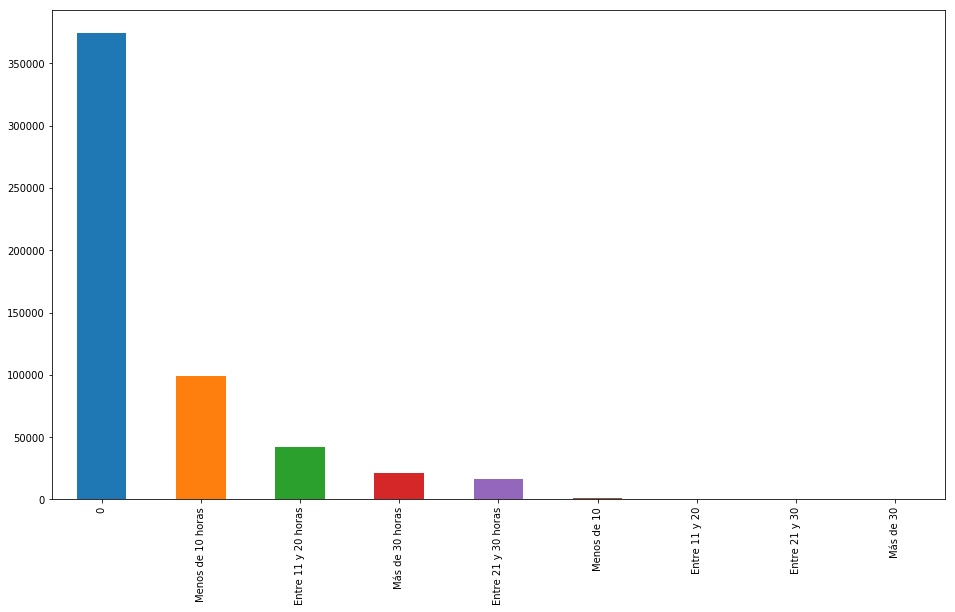

In [78]:
plt.figure(figsize=(16, 9))

icfes['ESTU_HORASSEMANATRABAJA'].value_counts(dropna=False).plot.bar()

In [77]:
icfes.to_csv("./data/ICFES/icfes_preprocessing.csv", index=False, encoding="utf-8")